<span style="color:orange;font-weight:700;font-size:20px">

# Task 4 - Time Series and Simple Linear Regression <br>
</span>

Author: [Adrian Vega](https://github.com/adriacv17) <br >Respository: [datafun-07-ml-predictive](https://github.com/adriacv17/datafun-07-ml-predictive) <br> Data: 10/02/2023 <br>Implement 10.16 and 15.4


## Part 1 - Linear Regression

### Celsius vs Fahrenheit Conversion

In [ ]:
import pandas as pd #import libraries


# c = 5/9 * (f-32) conversion equation from Fahrenheit to Celsius

c = lambda f:5/9 * (f-32) # conversion using above formula
temps = [(f,c(f)) for f in range(0 ,101, 10)] #calculate Celsius equivalents of Fahrenheit 0-100 in 10 degree increments

### Place data in DataFrame

In [ ]:
temps_df= pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius']) #data frame created from tuple conversion above.


### Plot DataFrame Celsius vs Fahrenheit

In [ ]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-') #plot method for labeling and line style(y label only labels legend)
y_label = axes.set_ylabel('Celsius') # set label for dependent variable y axis

### Section 1 - Load: Follow the instructions to load NY City January high temperature from a csv file into a DataFrame

In [ ]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv') # load CSV into DataFrame

nyc #call DataFrame

### Section 2 - View: Follow the instructions to view head and tail of the file. 

#### Head of DataFrame

In [ ]:
nyc.head() #view head of file


#### Tail of DataFrame

In [ ]:
nyc.tail() # view tail of file

### Section 3 - Clean: Follow the instructions to clean the data.

In [ ]:
nyc.columns= ['Date', 'Temperature', 'Anomaly'] # Renaming value to temperature for readablity

nyc.head(3) #show top 3 to confirm change

In [ ]:
# Removing the 01(January) from the Date column

#first check type of data
nyc.Date.dtype


In [ ]:
#data type is int, use floordiv to divide 100 to truncate the last two digits
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3) #call head of DataFrame

### Section 4 - Describe: Use describe() to calculate basic descriptive statistics for the dataset. 

In [ ]:
pd.set_option('display.precision', 2) #format for floating-point values

nyc.Temperature.describe() #call describe() function on Temperature column

### Section 5 - Calculate Line: Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [ ]:
from scipy import stats #import stats module from Scientific Python Library(SciPy)

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature) #Use linregress fuction from stats module to calculate slope and intercept


#### Slope

In [ ]:
linear_regression.slope #call slope 

#### Intercept

In [ ]:
linear_regression.intercept #call intercept

### Section 6 - Predict: Use your results to predict the "average high temp in Jan" for the year 2026.

In [ ]:
linear_regression.slope * 2026 + linear_regression.intercept #add year(x) to equation y = mx + b 

### Section 7 - Plot: Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

In [ ]:
import seaborn as sns #import seaborn

sns.set_style('whitegrid') #select style of grid using set_style

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature) # name variables to plot for x and y

axes.set_ylim(10, 70) #scale the y-axis from 21.5 degree range to 60 degree range(10-70)

## Part 2 - Machine Learning

### Initial Set-up

In [ ]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')  #load csv into DataFrame

nyc.columns= ['Date','Temperature', 'Anomaly'] #rename 'Value' column as 'Temperature'

nyc.Date = nyc.Date.floordiv(100) #remove 01 from end of date by using floordiv

nyc.head(3) # call head to find out if changes occured

### Splitting Data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split #import function train_test_split from sklear.model_selection module

# Return tuple of four elements using train_test_split
#Uppercase X for samples, lowercase y used for target values

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1),  # reshape method to transform from one dimension array to two dimension
                                                     nyc.Temperature.values, random_state=11)

#Confirm Split
print(f'Train = ',X_train.shape)
print(f'Test = ', X_test.shape)

### Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression #import function LinearRegression to train LinearRegression estimator

linear_regression=LinearRegression()

linear_regression.fit(X=X_train, y=y_train) #fit returns the estimator and train



#### Calling Slope and Intercept

In [ ]:
linear_regression.coef_ #Slope stored in estimator's coeff_ attribute

In [ ]:
linear_regression.intercept_ #intercept stored in estimator's intercept_ attribute

### Testing the Model

In [ ]:
predicted = linear_regression.predict(X_test)

expected = y_test #assign expected from tuple that was split

# Display predicted and expected for every 5th element
for p, e in zip(predicted[::5], expected[::5]):  
    print(f'predicted: {p:.2f}, expected: {e:.2f}') #print as function for readability

### Predicting Future Temperture and Estimating Past Temperature

In [ ]:
# y = mx + b
# coef_ as m and intercept_ as b

predict =(lambda x: linear_regression.coef_ * x +linear_regression.intercept_) #formula as y = mx+b by plugging in year as x using lambda as function

print(f' 2019 prediction: ',predict(2019))
print(f' 1890 prediction: ',predict(1890))

### Visualizing the Dataset with the Regression Line

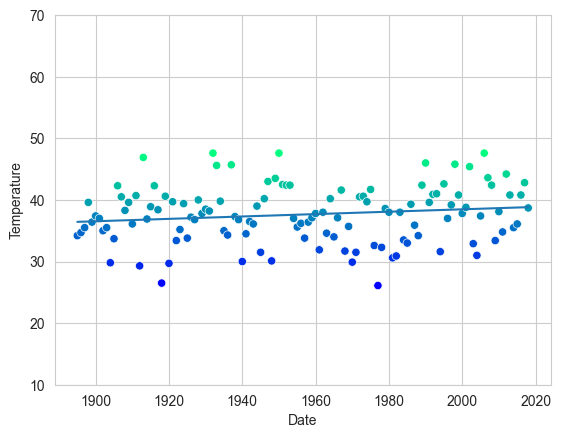

In [154]:
import seaborn as sns #import visualization library
import numpy as np #import numpy for creating array
import matplotlib.pyplot as plt #import to plot line on x and y coordinate points

# set up scatterplot using seaborn's scatterplot function
# to arguments add data as nyc
# to arguments name x and y columns
# add dot colors using hue
# add Matplotlib color map using palette for dot colors
# legend false to not show a legend
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False) 
axes.set_ylim(10, 70) #scale the y-axis range values to see linear relationship better

x= np.array([min(nyc.Date.values), max(nyc.Date.values)])
y= predict(x)
line = plt.plot(x, y) #plotting line using matplotlib

### Comparing Two Linear-Regression Methods

Both methods are a good way to demonstrate and plot linear regression, but from the work and code it looks as if using Linear Regression from chapter 10 method 
was a bit easier to use. With the second method, plotting and visualization seems to be the winner as it gives you more functionality for this purpose.